In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('AMD_original_data.csv')

C:\Users\Lamla\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (23,26,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386118 entries, 0 to 1386117
Data columns (total 38 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   secid             1386118 non-null  int64  
 1   date              1386118 non-null  object 
 2   symbol            1386118 non-null  object 
 3   symbol_flag       1386118 non-null  int64  
 4   exdate            1386118 non-null  object 
 5   last_date         1263749 non-null  object 
 6   cp_flag           1386118 non-null  object 
 7   strike_price      1386118 non-null  int64  
 8   best_bid          1386118 non-null  float64
 9   best_offer        1386118 non-null  float64
 10  volume            1386118 non-null  int64  
 11  open_interest     1386118 non-null  int64  
 12  impl_volatility   1166644 non-null  float64
 13  delta             1166644 non-null  float64
 14  gamma             1166644 non-null  float64
 15  vega              1166644 non-null  float64
 16  

In [4]:
print('industry_group:', df['industry_group'].unique())
print('expiry_indicator:', df['expiry_indicator'].unique())
print('symbol:', df['symbol'].unique())
print('cp_flag:', df['cp_flag'].unique())

print('cusip:', df['cusip'].unique())
print('ticker:', df['ticker'].unique())
print('issue_type:', df['issue_type'].unique())
print('issuer:', df['issuer'].unique())
print('exercise_style:', df['exercise_style'].unique())

industry_group: [ nan 814.]
expiry_indicator: ['w' nan]
symbol: ['AMD 220304P143000' 'AMD 220304P144000' 'AMD 220304P145000' ...
 'SMCI 230818P140000' 'SMCI 231215C140000' 'SMCI 231215P140000']
cp_flag: ['P' 'C']
cusip: [790310 '00790310' '67066G10' '87403910' 87403910 '86800U10']
ticker: ['AMD' 'NVDA' 'TSM' 'SMCI']
issue_type: [0 '0' 'F']
issuer: ['ADVANCED MICRO DEVICES INC.' 'NVIDIA CORP'
 'TAIWAN SEMICONDUCTOR MANUFAC' 'SUPER MICRO COMPUTER INC']
exercise_style: ['A']


7 columns (class, div_convention, am_set_flag, forward_price, root, suffix) have all NaN values, so we will remove these columns. </br>
Columns 'industry_group' and 'expiry_indicator' only has one unique value excluding Nan values, so we will remove them too. </br>
Column 'exercise_style' only has 1 unique value, so we will remove it too. 

In [5]:
df2 = df.copy()
df2 = df2.drop(['class', 'div_convention', 'am_set_flag', 'forward_price', 'root', 'suffix', 
              'industry_group', 'expiry_indicator', 'exercise_style'], axis=1)
print(len(df2))

1386118


In [6]:
clean_df = df2.dropna()
print('# of rows after dropping rows with NaN values:', len(clean_df))

clean_df = clean_df.drop_duplicates()
print('# of rows after dropping duplicated rows:', len(clean_df))

clean_df.head()

# of rows after dropping rows with NaN values: 1083751
# of rows after dropping duplicated rows: 1083751


,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,...,am_settlement,contract_size,ss_flag,cusip,ticker,sic,index_flag,exchange_d,issue_type,issuer
0,101121,2022-02-28,AMD 220304P143000,1,2022-03-04,2022-02-28,P,143000,18.30,21.70,...,0,100,0,790310,AMD,3674,0,5,0,ADVANCED MICRO DEVICES INC.
1,101121,2022-02-28,AMD 220304P144000,1,2022-03-04,2022-02-22,P,144000,19.65,22.55,...,0,100,0,790310,AMD,3674,0,5,0,ADVANCED MICRO DEVICES INC.
2,101121,2022-02-28,AMD 220304P145000,1,2022-03-04,2022-02-28,P,145000,20.45,23.70,...,0,100,0,790310,AMD,3674,0,5,0,ADVANCED MICRO DEVICES INC.
3,101121,2022-02-28,AMD 220304P146000,1,2022-03-04,2022-02-28,P,146000,21.30,24.75,...,0,100,0,790310,AMD,3674,0,5,0,ADVANCED MICRO DEVICES INC.
4,101121,2022-02-28,AMD 220304P147000,1,2022-03-04,2022-02-28,P,147000,23.50,25.75,...,0,100,0,790310,AMD,3674,0,5,0,ADVANCED MICRO DEVICES INC.


In [7]:
# Convert dates from object to datetime
clean_df['date']= pd.to_datetime(clean_df['date'])
clean_df['exdate']= pd.to_datetime(clean_df['exdate'])
clean_df['last_date']= pd.to_datetime(clean_df['last_date'])

date_range = str(clean_df['date'].dt.date.min()) + ' to ' +str(clean_df['date'].dt.date.max())
print('Date range:', date_range)
print()

# Sort data by date
clean_df = clean_df.sort_values(by='date')

# Convert columns with dtype = object to string
clean_df['symbol'] = clean_df['symbol'].astype("string")
clean_df['cp_flag'] = clean_df['cp_flag'].astype("string")
clean_df['cusip'] = clean_df['cusip'].astype("string")
clean_df['ticker'] = clean_df['ticker'].astype("string")
clean_df['issue_type'] = clean_df['issue_type'].astype("string")
clean_df['issuer'] = clean_df['issuer'].astype("string")

# clean_df['date']= clean_df['date'].astype("string")
# clean_df['exdate']= clean_df['exdate'].astype("string")
# clean_df['last_date']= clean_df['last_date'].astype("string")

clean_df.info()

Date range: 2022-02-28 to 2023-02-28

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1083751 entries, 0 to 1386117
Data columns (total 29 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   secid            1083751 non-null  int64         
 1   date             1083751 non-null  datetime64[ns]
 2   symbol           1083751 non-null  string        
 3   symbol_flag      1083751 non-null  int64         
 4   exdate           1083751 non-null  datetime64[ns]
 5   last_date        1083751 non-null  datetime64[ns]
 6   cp_flag          1083751 non-null  string        
 7   strike_price     1083751 non-null  int64         
 8   best_bid         1083751 non-null  float64       
 9   best_offer       1083751 non-null  float64       
 10  volume           1083751 non-null  int64         
 11  open_interest    1083751 non-null  int64         
 12  impl_volatility  1083751 non-null  float64       
 13  delta            10

(19389.0, 19416.0)

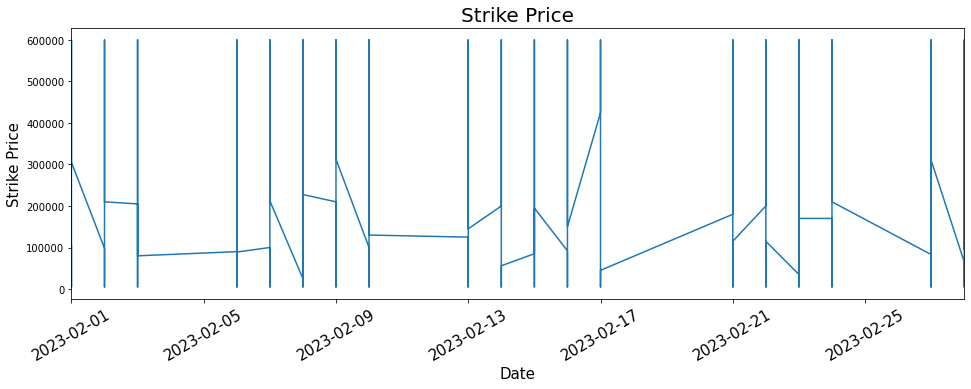

In [8]:
fig = plt.subplots(figsize=(16, 5))
plt.plot(clean_df['date'], clean_df['strike_price'])
plt.title('Strike Price', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Strike Price', fontsize=15)
plt.xticks(rotation=30, fontsize=15)
plt.xlim(pd.Timestamp('2023-02-01'), pd.Timestamp('2023-02-28'))

In [9]:
filtered_df = clean_df.loc[(clean_df['date'] >= '2023-02-01') & (clean_df['date'] < '2023-02-28')]
filtered_df2 = filtered_df.loc[(filtered_df['strike_price'] > 500000)]
filtered_df2 

,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,...,am_settlement,contract_size,ss_flag,cusip,ticker,sic,index_flag,exchange_d,issue_type,issuer
1294736,108321,2023-02-01,NVDA 230616C600000,1,2023-06-16,2023-02-01,C,600000,0.01,0.04,...,0,100,0,67066G10,NVDA,3674,0,4,0,NVIDIA CORP
1294733,108321,2023-02-01,NVDA 230616C560000,1,2023-06-16,2023-02-01,C,560000,0.00,0.05,...,0,100,0,67066G10,NVDA,3674,0,4,0,NVIDIA CORP
1294731,108321,2023-02-01,NVDA 230616C540000,1,2023-06-16,2023-01-27,C,540000,0.01,0.06,...,0,100,0,67066G10,NVDA,3674,0,4,0,NVIDIA CORP
1294730,108321,2023-02-01,NVDA 230616C520000,1,2023-06-16,2022-12-08,C,520000,0.02,0.07,...,0,100,0,67066G10,NVDA,3674,0,4,0,NVIDIA CORP
1294734,108321,2023-02-01,NVDA 230616C580000,1,2023-06-16,2023-01-27,C,580000,0.00,0.05,...,0,100,0,67066G10,NVDA,3674,0,4,0,NVIDIA CORP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337343,108321,2023-02-27,NVDA 230317C540000,1,2023-03-17,2023-02-24,C,540000,0.00,0.01,...,0,100,0,67066G10,NVDA,3674,0,4,0,NVIDIA CORP
1337345,108321,2023-02-27,NVDA 230317C560000,1,2023-03-17,2023-02-24,C,560000,0.00,0.01,...,0,100,0,67066G10,NVDA,3674,0,4,0,NVIDIA CORP
1337346,108321,2023-02-27,NVDA 230317C580000,1,2023-03-17,2023-02-21,C,580000,0.00,0.01,...,0,100,0,67066G10,NVDA,3674,0,4,0,NVIDIA CORP
1337348,108321,2023-02-27,NVDA 230317C600000,1,2023-03-17,2023-02-21,C,600000,0.00,0.01,...,0,100,0,67066G10,NVDA,3674,0,4,0,NVIDIA CORP


# Feature Selection

In [10]:
reduced_df = clean_df.copy()

# remove any columns that are not numerical
reduced_df = reduced_df.drop(['date', 'exdate', 'last_date', 'cusip', 'ticker', 'cp_flag', 
                          'issue_type', 'issuer', 'symbol'], axis=1)

In [11]:
reduced_df.describe()

,secid,symbol_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility,delta,gamma,vega,theta,optionid,cfadj,am_settlement,contract_size,ss_flag,sic,index_flag,exchange_d
count,1.083751e+06,1083751.0,1.083751e+06,1.083751e+06,1.083751e+06,1.083751e+06,1.083751e+06,1.083751e+06,1.083751e+06,1.083751e+06,1.083751e+06,1.083751e+06,1.083751e+06,1.083751e+06,1083751.0,1083751.0,1083751.0,1.083751e+06,1083751.0,1.083751e+06
mean,1.071971e+05,1.0,1.598484e+05,2.796881e+01,2.907264e+01,2.456742e+02,1.501814e+03,6.425439e-01,-6.325655e-03,9.434495e-03,1.703430e+01,-1.914759e+01,1.455886e+08,1.342430e+00,0.0,100.0,0.0,3.671723e+03,0.0,3.749474e+00
std,4.901310e+03,0.0,1.067001e+05,5.026107e+01,5.145317e+01,1.686362e+03,3.441438e+03,3.205348e-01,5.684942e-01,1.392345e-02,2.176642e+01,3.241476e+01,4.297892e+06,9.539564e-01,0.0,0.0,0.0,1.514380e+01,0.0,1.346187e+00
min,1.011210e+05,1.0,5.000000e+03,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,8.018000e-02,-9.999280e-01,0.000000e+00,5.160000e-04,-1.014567e+03,1.326510e+08,1.000000e+00,0.0,100.0,0.0,3.571000e+03,0.0,1.000000e+00
25%,1.011210e+05,1.0,8.500000e+04,5.800000e-01,7.300000e-01,0.000000e+00,4.100000e+01,4.810300e-01,-3.771310e-01,1.741000e-03,2.268304e+00,-2.157041e+01,1.428268e+08,1.000000e+00,0.0,100.0,0.0,3.674000e+03,0.0,4.000000e+00
50%,1.083210e+05,1.0,1.260000e+05,6.900000e+00,7.400000e+00,4.000000e+00,3.080000e+02,5.525470e-01,1.735000e-03,4.601000e-03,8.372753e+00,-1.001123e+01,1.462413e+08,1.000000e+00,0.0,100.0,0.0,3.674000e+03,0.0,4.000000e+00
75%,1.083210e+05,1.0,2.100000e+05,3.185000e+01,3.340000e+01,5.000000e+01,1.337000e+03,6.823350e-01,3.598010e-01,1.104700e-02,2.330044e+01,-4.021181e+00,1.486494e+08,1.000000e+00,0.0,100.0,0.0,3.674000e+03,0.0,5.000000e+00
max,1.292170e+05,1.0,6.000000e+05,4.825000e+02,4.865500e+02,1.764690e+05,9.757500e+04,2.999406e+00,9.999870e-01,3.568210e-01,1.536658e+02,8.139670e+00,1.529053e+08,4.000000e+00,0.0,100.0,0.0,3.674000e+03,0.0,5.000000e+00


In [12]:
# sns.heatmap(reduced_df, annot=True)   # Take too long 

In [13]:
# Calculating the correlation of column A against all others
corr_matrix = reduced_df.corr()['strike_price']

# Sort correlation pairs 
sorted_matrix = corr_matrix.sort_values(ascending = False) 

sorted_matrix

strike_price       1.000000
best_offer         0.347108
best_bid           0.346690
vega               0.220865
sic                0.130257
exchange_d         0.127144
secid              0.076425
cfadj              0.045742
theta              0.015682
impl_volatility   -0.028603
volume            -0.031622
open_interest     -0.068411
optionid          -0.161395
delta             -0.284771
gamma             -0.289562
symbol_flag             NaN
am_settlement           NaN
contract_size           NaN
ss_flag                 NaN
index_flag              NaN
Name: strike_price, dtype: float64

In [14]:
selected_columns = ['strike_price', 'best_offer', 'best_bid', 'vega', 'sic', 'exchange_d', 
                    'optionid', 'delta', 'gamma']

reduced_df2 = clean_df[selected_columns].copy()

reduced_df2.head()

,strike_price,best_offer,best_bid,vega,sic,exchange_d,optionid,delta,gamma
0,143000,21.70,18.30,1.700479,3674,5,144642442,-0.931618,0.011129
382211,370000,129.20,125.10,5.277512,3674,4,143322188,-0.953206,0.001736
382210,207500,1.23,1.19,6.537855,3674,4,145568484,-0.084127,0.005167
382209,205000,1.05,1.01,5.841609,3674,4,145033138,-0.072555,0.004551
382208,202500,0.90,0.86,5.218889,3674,4,145619771,-0.062625,0.003998


In [15]:
# # Calculating the correlation of column A against all others
# corr_matrix = clean_df.corr()['strike_price']  # same results as when using reduced_df b/c corr() do not take non-numerical objects

# # Sort correlation pairs 
# sorted_matrix = corr_matrix.sort_values(ascending = False) 

# sorted_matrix

strike_price       1.000000
best_offer         0.347108
best_bid           0.346690
vega               0.220865
sic                0.130257
exchange_d         0.127144
secid              0.076425
cfadj              0.045742
theta              0.015682
impl_volatility   -0.028603
volume            -0.031622
open_interest     -0.068411
optionid          -0.161395
delta             -0.284771
gamma             -0.289562
symbol_flag             NaN
am_settlement           NaN
contract_size           NaN
ss_flag                 NaN
index_flag              NaN
Name: strike_price, dtype: float64